In [25]:
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [26]:
def convert (s):
    new = ""
    for x in s:
        new += x
    return new

def get_variable(dataset):
    nodal_names = []
    for i in range(dataset.variables['name_nod_var'].shape[0]):
        name = convert(str(str(str(nc.variables['name_nod_var'][i].data).split("'")[1:len(nc.variables['name_nod_var'][i].data):2]).split("''")[0]))
        nodal_names.append(name[1:len(name)-2])
    return nodal_names

In [27]:
import string

char_set = set(string.ascii_letters + string.digits + '_')


In [28]:
nc = netCDF4.Dataset('exhmdkksts_5_out2.e')



In [29]:
nodal_names = get_variable(nc)
nodal_names

["'a', 'c', 'c', 'e', 'l', '_', 'x'",
 "'a', 'c', 'c', 'e', 'l', '_', 'y'",
 "'a', 'c', 'c', 'e', 'l', '_', 'z'",
 "'b', 'o', 'x'",
 "'c', 'o', 'n', 't', 'a', 'c', 't', '_', 'p', 'r', 'e', 's', 's', 'u', 'r', 'e'",
 "'d', 'e', 'n', 's', 'i', 't', 'y'",
 "'d', 'i', 's', 'p', '_', 'x'",
 "'d', 'i', 's', 'p', '_', 'y'",
 "'d', 'i', 's', 'p', '_', 'z'",
 "'e', 'l', 'a', 's', 't', 'i', 'c', '_', 'e', 'n', 'e', 'r', 'g', 'y'",
 "'k', 'i', 'n', 'e', 't', 'i', 'c', '_', 'e', 'n', 'e', 'r', 'g', 'y'",
 "'n', 'o', 'd', 'a', 'l', '_', 'a', 'r', 'e', 'a'",
 "'p', 'e', 'n', 'e', 't', 'r', 'a', 't', 'i', 'o', 'n'",
 "'s', 'u', 'b', 's', '_', 'c', 'o', 'm', 'b', 'i', 'n', 'e', 'd', '_', 'i', 'n', 'e', 'l', 'a', 's', 't', 'i', 'c', '_', 's', 't', 'r', 'a', 'i', 'n', '_', '0'",
 "'s', 'u', 'b', 's', '_', 'c', 'o', 'm', 'b', 'i', 'n', 'e', 'd', '_', 'i', 'n', 'e', 'l', 'a', 's', 't', 'i', 'c', '_', 's', 't', 'r', 'a', 'i', 'n', '_', '0'",
 "'s', 'u', 'b', 's', '_', 'c', 'o', 'm', 'b', 'i', 'n', 'e', 'd'

In [50]:
#convert each line of nodal names to a string
def combine_chars(char_list):
    return ''.join(char_list)

# print(combine_chars(nodal_names[0]))

def convert_string(input_string):
    name = str()
    char_set = set(string.ascii_letters + string.digits + '_')
    for n in range (0,len(input_string)):
        if input_string[n] in char_set:
            name = name + input_string[n]
    return name

# input_string = nodal_names[0]

# name = str()
# for n in range (0,len(input_string)):
#     if input_string[n] in char_set:
#         name = name + input_string[n]
var_names = [None] * len(nodal_names)
for p in range (0,len(nodal_names)):
    var_names[p] = convert_string(nodal_names[p])

In [51]:
# find the variable names subs_stress_00
stress_00_idx = np.where(np.array(var_names) == 'subs_stress_00')
stress_00_idx = stress_00_idx[0][0]
stress_00_idx

56

In [52]:
density_idx = np.where(np.array(var_names) == 'density')
density_idx = density_idx[0][0]
density_idx

5

In [53]:
vel_x_idx = np.where(np.array(var_names) == 'vel_x')
vel_x_idx = vel_x_idx[0][0]
vel_y_idx = np.where(np.array(var_names) == 'vel_y')
vel_y_idx = vel_y_idx[0][0]
vel_z_idx = np.where(np.array(var_names) == 'vel_z')
vel_z_idx = vel_z_idx[0][0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [54]:
from scipy.interpolate import RegularGridInterpolator
connect = nc.variables['connect1']

density = np.array(nc.variables['vals_nod_var6'])[-1,:]
density = np.array(nc.variables['vals_nod_var6'])[-1,:]

density = density[np.flatnonzero(density>0)]
# density.shape

X, indices = np.unique(np.array(nc.variables['coordx'][0:1000]), return_inverse=True)
Y, indices = np.unique(np.array(nc.variables['coordy'][0:1000]), return_inverse=True)
Z, indices = np.unique(np.array(nc.variables['coordz'][:]), return_inverse=True)
Z = Z[np.flatnonzero(Z <= 1)]

vals = np.array(nc.variables['vals_nod_var57'])[-1,0:int(len(X)*len(Y)*len(Z))]

x_unsort = np.array(nc.variables['coordx'][0:len(vals)])
y_unsort = np.array(nc.variables['coordy'][0:len(vals)])
z_unsort = np.array(nc.variables['coordz'][0:len(vals)])

xg, yg, zg = np.meshgrid(X, Y, Z)

vals = np.array(nc.variables['vals_nod_var57'])[-1,:]
##search algorithm
searchpoint = np.zeros([3])
vals_idx = np.zeros([xg.shape[0], xg.shape[1], xg.shape[2]])
for n in range (0,len(x_unsort)):
    searchpoint = [x_unsort[n], y_unsort[n], z_unsort[n]]
    x_idx = np.where(xg == searchpoint[0],1,0)
    y_idx = np.where(yg == searchpoint[1],1,0)
    z_idx = np.where(zg == searchpoint[2],1,0)
    idx = np.where((x_idx == 1) & (y_idx == 1) & (z_idx == 1))
    
    vals_idx[int(idx[0]), int(idx[1]), int(idx[2])] = vals[n]

x_vals = np.linspace(0.25, 0.75, 20)
y_vals = np.linspace(0.25, 0.75, 20)
# z_vals = np.linspace(0, 0.9999, 30)
z_vals = np.linspace(0, 1, 20)


interp_values = RegularGridInterpolator(points = (X, Y, Z), values= vals_idx, method='cubic', bounds_error=False, fill_value=None)



/var/folders/sv/2rkdh3f9501gm4wslzx7hffw0000gn/T/ipykernel_78236/3292126779.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  vals_idx[int(idx[0]), int(idx[1]), int(idx[2])] = vals[n]


In [87]:
def build_field(fieldvar, x_vals, y_vals, z_vals):
    xg, yg, zg = np.meshgrid(x_vals, y_vals, z_vals)
    searchpoint = np.zeros([3])
    vals_idx = np.zeros([xg.shape[0], xg.shape[1], xg.shape[2]])
    for n in range (0,len(x_unsort)):
        searchpoint = [x_vals[n], y_vals[n], z_vals[n]]
        x_idx = np.where(xg == searchpoint[0],1,0)
        y_idx = np.where(yg == searchpoint[1],1,0)
        z_idx = np.where(zg == searchpoint[2],1,0)
        idx = np.where((x_idx == 1) & (y_idx == 1) & (z_idx == 1))
        
        vals_idx[int(idx[0]), int(idx[1]), int(idx[2])] = vals[n]

        x_vals = np.linspace(0.25, 0.75, 20)
        y_vals = np.linspace(0.25, 0.75, 20)
        # z_vals = np.linspace(0, 0.9999, 30)
        z_vals = np.linspace(0, 1, 20)

        interp_values = RegularGridInterpolator(points = (x_vals, y_vals, z_vals), values= vals_idx, method='cubic', bounds_error=False, fill_value=None)


        RVE_x, RVE_y, RVE_z = np.meshgrid(x_vals, y_vals, z_vals, indexing='ij')
        RVE_stress_00 = np.zeros(RVE_x.shape)
        for i in range(RVE_x.shape[0]):
            for j in range(RVE_y.shape[1]):
                for k in range(RVE_z.shape[2]):
                    # print(RVE_x[i,j,k], RVE_y[i,j,k], RVE_z[i,j,k])
                    RVE_stress_00[i,j,k] = interp_values([RVE_x[i,j,k], RVE_y[i,j,k], RVE_z[i,j,k]])
    
    return RVE_stress_00

# ???

In [13]:
vals_idx.shape

(31, 31, 41)

In [48]:
np.average(zg, axis=(0,1))

array([0.    , 0.1   , 0.2   , 0.3   , 0.4   , 0.425 , 0.45  , 0.475 ,
       0.5   , 0.525 , 0.55  , 0.575 , 0.6   , 0.625 , 0.65  , 0.675 ,
       0.7   , 0.7125, 0.725 , 0.7375, 0.75  , 0.7625, 0.775 , 0.7875,
       0.8   , 0.8125, 0.825 , 0.8375, 0.85  , 0.8625, 0.875 , 0.8875,
       0.9   , 0.9125, 0.925 , 0.9375, 0.95  , 0.9625, 0.975 , 0.9875,
       1.    ])

In [49]:
np.average(vals_idx, axis=(0,1))

array([ -10.6771192 ,  -10.6771192 ,  -17.22072602,  -23.76433283,
        -36.32012233,  -48.87591183,  -63.35457343,  -77.83323504,
        -94.5308012 , -111.22836737, -130.1420877 , -149.05580803,
       -168.44392356, -187.8320391 , -204.09696817, -220.36189725,
       -232.61532589, -244.86875454, -254.38214316, -263.89553179,
       -273.75548951, -283.61544722, -292.63400985, -301.65257247,
       -308.91792788, -316.18328328, -323.53926699, -330.8952507 ,
       -340.19194398, -349.48863725, -361.18868278, -372.88872832,
       -382.85989483, -392.83106133, -394.46609257, -396.1011238 ,
       -390.67239563, -385.24366746, -362.11458352, -338.98549959,
       -338.98549959])

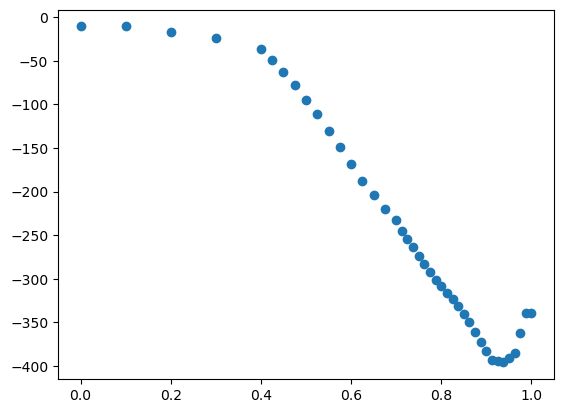

In [55]:
plt.plot(Z,np.average(vals_idx, axis=(0,1)), 'o')

In [56]:
np.array(nc.variables['vals_nod_var57'])[-1,0:int(len(X)*len(Y)*len(Z))].shape

(39401,)

In [173]:
z_vals

array([0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,
       0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,
       0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.48275862,
       0.51724138, 0.55172414, 0.5862069 , 0.62068966, 0.65517241,
       0.68965517, 0.72413793, 0.75862069, 0.79310345, 0.82758621,
       0.86206897, 0.89655172, 0.93103448, 0.96551724, 1.        ])

In [146]:
len(z_unsort)

39401

In [148]:
len(vals)

41478

In [57]:
RVE_x, RVE_y, RVE_z = np.meshgrid(x_vals, y_vals, z_vals, indexing='ij')
RVE_stress_00 = np.zeros(RVE_x.shape)
for i in range(RVE_x.shape[0]):
    for j in range(RVE_y.shape[1]):
        for k in range(RVE_z.shape[2]):
            # print(RVE_x[i,j,k], RVE_y[i,j,k], RVE_z[i,j,k])
            RVE_stress_00[i,j,k] = interp_values([RVE_x[i,j,k], RVE_y[i,j,k], RVE_z[i,j,k]])


/var/folders/sv/2rkdh3f9501gm4wslzx7hffw0000gn/T/ipykernel_78236/2576227874.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  RVE_stress_00[i,j,k] = interp_values([RVE_x[i,j,k], RVE_y[i,j,k], RVE_z[i,j,k]])


In [19]:
print(i,j,k)

17 126 118


In [58]:
np.average(RVE_stress_00, axis=(0,1))

array([ -10.70613599,   -9.6166743 ,  -10.92656299,  -13.98553433,
        -18.14088436,  -22.22343186,  -23.99406888,  -27.43326514,
        -46.7521674 ,  -77.10611581, -112.24011845, -152.1020126 ,
       -192.28047234, -224.05045943, -262.82843672, -301.36051939,
       -331.55898218, -376.25024721, -390.12846114, -337.38853956])

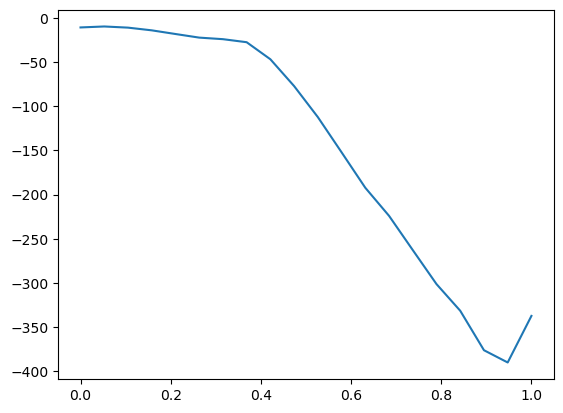

In [59]:
plt.plot(z_vals,np.average(RVE_stress_00, axis=(0,1)))

/var/folders/sv/2rkdh3f9501gm4wslzx7hffw0000gn/T/ipykernel_92305/1482015411.py:75: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  vals_idx[int(idx[0]), int(idx[1]), int(idx[2])] = vals[n]
/var/folders/sv/2rkdh3f9501gm4wslzx7hffw0000gn/T/ipykernel_92305/1482015411.py:100: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  RVE_stress_00_9[i,j,k] = interp_values([RVE_x[i,j,k], RVE_y[i,j,k], RVE_z[i,j,k]])


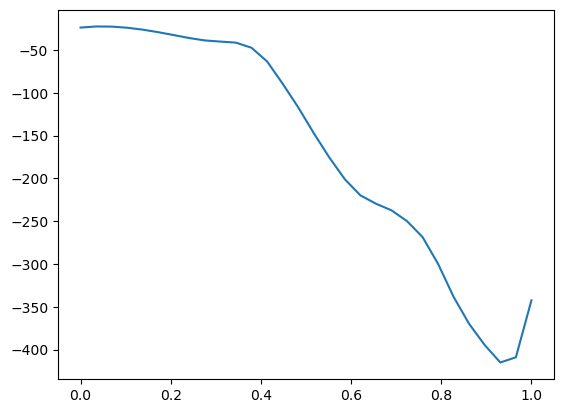

In [219]:
nc = netCDF4.Dataset('exhmdkksts_9_out2.e')


nodal_names = get_variable(nc)
nodal_names
#convert each line of nodal names to a string
def combine_chars(char_list):
    return ''.join(char_list)

# print(combine_chars(nodal_names[0]))

def convert_string(input_string):
    name = str()
    char_set = set(string.ascii_letters + string.digits + '_')
    for n in range (0,len(input_string)):
        if input_string[n] in char_set:
            name = name + input_string[n]
    return name

# input_string = nodal_names[0]

# name = str()
# for n in range (0,len(input_string)):
#     if input_string[n] in char_set:
#         name = name + input_string[n]
var_names = [None] * len(nodal_names)
for p in range (0,len(nodal_names)):
    var_names[p] = convert_string(nodal_names[p])
# find the variable names subs_stress_00
stress_00_idx = np.where(np.array(var_names) == 'subs_stress_00')
stress_00_idx = stress_00_idx[0][0]
density_idx = np.where(np.array(var_names) == 'density')
density_idx = density_idx[0][0]
density_idx
vel_x_idx = np.where(np.array(var_names) == 'vel_x')
vel_x_idx = vel_x_idx[0][0]
vel_y_idx = np.where(np.array(var_names) == 'vel_y')
vel_y_idx = vel_y_idx[0][0]
vel_z_idx = np.where(np.array(var_names) == 'vel_z')
vel_z_idx = vel_z_idx[0][0]
density = np.array(nc.variables['vals_nod_var6'])[-1,:]

density = density[np.flatnonzero(density>0)]
# density.shape
from scipy.interpolate import RegularGridInterpolator
connect = nc.variables['connect1']

density = np.array(nc.variables['vals_nod_var6'])[-1,:]


X, indices = np.unique(np.array(nc.variables['coordx'][0:1000]), return_inverse=True)
Y, indices = np.unique(np.array(nc.variables['coordy'][0:1000]), return_inverse=True)
Z, indices = np.unique(np.array(nc.variables['coordz'][:]), return_inverse=True)
Z = Z[np.flatnonzero(Z <= 1)]

vals = np.array(nc.variables['vals_nod_var57'])[-1,0:int(len(X)*len(Y)*len(Z))]

x_unsort = np.array(nc.variables['coordx'][0:len(vals)])
y_unsort = np.array(nc.variables['coordy'][0:len(vals)])
z_unsort = np.array(nc.variables['coordz'][0:len(vals)])

xg, yg, zg = np.meshgrid(X, Y, Z)

vals = np.array(nc.variables['vals_nod_var57'])[-1,:]
##search algorithm
searchpoint = np.zeros([3])
vals_idx = np.zeros([xg.shape[0], xg.shape[1], xg.shape[2]])
for n in range (0,len(x_unsort)):
    searchpoint = [x_unsort[n], y_unsort[n], z_unsort[n]]
    x_idx = np.where(xg == searchpoint[0],1,0)
    y_idx = np.where(yg == searchpoint[1],1,0)
    z_idx = np.where(zg == searchpoint[2],1,0)
    idx = np.where((x_idx == 1) & (y_idx == 1) & (z_idx == 1))
    
    vals_idx[int(idx[0]), int(idx[1]), int(idx[2])] = vals[n]

x_vals = np.linspace(0.25, 0.75, 30)
y_vals = np.linspace(0.25, 0.75, 30)
# z_vals = np.linspace(0, 0.9999, 30)
z_vals = np.linspace(0, 1, 30)

interp_values = RegularGridInterpolator(points = (X, Y, Z), values= vals_idx, method='cubic', bounds_error=False, fill_value=None)


vals_idx.shape
np.average(zg, axis=(0,1))
np.average(vals_idx, axis=(0,1))
# plt.plot(Z,np.average(vals_idx, axis=(0,1)))
np.array(nc.variables['vals_nod_var57'])[-1,0:int(len(X)*len(Y)*len(Z))].shape
# z_vals
# len(z_unsort)
# len(vals)
# plt.plot(nc.variables['coordx'][0:int(vals.shape[0])])
RVE_x, RVE_y, RVE_z = np.meshgrid(x_vals, y_vals, z_vals, indexing='ij')
RVE_stress_00_9 = np.zeros(RVE_x.shape)
for i in range(RVE_x.shape[0]):
    for j in range(RVE_y.shape[1]):
        for k in range(RVE_z.shape[2]):
            # print(RVE_x[i,j,k], RVE_y[i,j,k], RVE_z[i,j,k])
            RVE_stress_00_9[i,j,k] = interp_values([RVE_x[i,j,k], RVE_y[i,j,k], RVE_z[i,j,k]])

# plt.plot(RVE_stress_00.flatten())
plt.plot(z_vals,np.average(RVE_stress_00_9, axis=(0,1)))

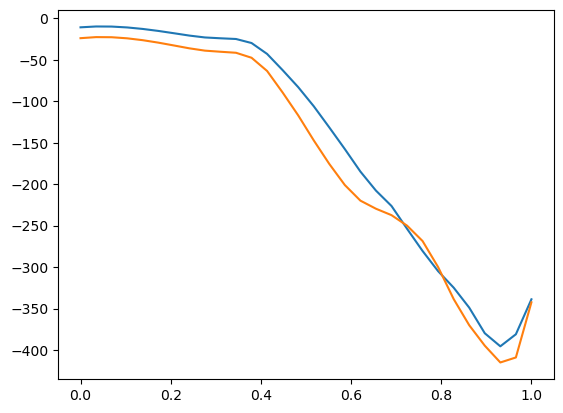

In [229]:
plt.plot(z_vals,np.average(RVE_stress_00, axis=(0,1)))
plt.plot(z_vals,np.average(RVE_stress_00_9, axis=(0,1)))

In [74]:
import glob
import os
filelist = glob.glob("testset/*.e")


['testset/kyriibccxe_3_out2.e', 'testset/kyriibccxe_1_out2.e', 'testset/kyriibccxe_5_out2.e', 'testset/kyriibccxe_2_out2.e', 'testset/kyriibccxe_0_out2.e', 'testset/kyriibccxe_4_out2.e', 'testset/kyriibccxe_6_out2.e']


In [83]:
nc = netCDF4.Dataset(filelist[0])
nodal_names = get_variable(nc)
var_names = [None] * len(nodal_names)
for p in range (0,len(nodal_names)):
    var_names[p] = convert_string(nodal_names[p])

addensity_idx = np.where(np.array(var_names) == 'ADdensity')
addensity_idx= addensity_idx[0][0]
vel_x_idx = np.where(np.array(var_names) == 'vel_x')
vel_x_idx = vel_x_idx[0][0]
vel_y_idx = np.where(np.array(var_names) == 'vel_y')
vel_y_idx = vel_y_idx[0][0]
vel_z_idx = np.where(np.array(var_names) == 'vel_z')
vel_z_idx = vel_z_idx[0][0]

shotdensity = np.array(nc.variables['vals_nod_var{}'.format(int(addensity_idx+1))])[-1,:]
shotdensity_fixed = shotdensity[np.flatnonzero(shotdensity>0)]

X_shot, indices = np.unique(np.array(nc.variables['coordx'][np.flatnonzero(shotdensity>0)]), return_inverse=True)
Y_shot, indices = np.unique(np.array(nc.variables['coordy'][np.flatnonzero(shotdensity>0)]), return_inverse=True)
Z_shot, indices = np.unique(np.array(nc.variables['coordz'][np.flatnonzero(shotdensity>0)]), return_inverse=True)

In [84]:
print(X_shot.shape, Y_shot.shape, Z_shot.shape)

(306,) (308,) (145,)


In [ ]:
for t in range (0,len(filelist)):
    nc = netCDF4.Dataset(filelist[t])


    nodal_names = get_variable(nc)
    nodal_names
    #convert each line of nodal names to a string
    def combine_chars(char_list):
        return ''.join(char_list)

    # print(combine_chars(nodal_names[0]))

    def convert_string(input_string):
        name = str()
        char_set = set(string.ascii_letters + string.digits + '_')
        for n in range (0,len(input_string)):
            if input_string[n] in char_set:
                name = name + input_string[n]
        return name

    # input_string = nodal_names[0]

    # name = str()
    # for n in range (0,len(input_string)):
    #     if input_string[n] in char_set:
    #         name = name + input_string[n]
    var_names = [None] * len(nodal_names)
    for p in range (0,len(nodal_names)):
        var_names[p] = convert_string(nodal_names[p])
    # find the variable names subs_stress_00
    stress_00_idx = np.where(np.array(var_names) == 'subs_stress_00')
    stress_00_idx = stress_00_idx[0][0]
    density_idx = np.where(np.array(var_names) == 'density')
    density_idx = density_idx[0][0]
    density_idx
    vel_x_idx = np.where(np.array(var_names) == 'vel_x')
    vel_x_idx = vel_x_idx[0][0]
    vel_y_idx = np.where(np.array(var_names) == 'vel_y')
    vel_y_idx = vel_y_idx[0][0]
    vel_z_idx = np.where(np.array(var_names) == 'vel_z')
    vel_z_idx = vel_z_idx[0][0]
    density = np.array(nc.variables['vals_nod_var6'])[-1,:]

    density = density[np.flatnonzero(density>0)]
    # density.shape
    from scipy.interpolate import RegularGridInterpolator
    connect = nc.variables['connect1']

    density = np.array(nc.variables['vals_nod_var6'])[-1,:]


    X, indices = np.unique(np.array(nc.variables['coordx'][0:1000]), return_inverse=True)
    Y, indices = np.unique(np.array(nc.variables['coordy'][0:1000]), return_inverse=True)
    Z, indices = np.unique(np.array(nc.variables['coordz'][:]), return_inverse=True)
    Z = Z[np.flatnonzero(Z <= 1)]

    vals = np.array(nc.variables['vals_nod_var57'])[-1,0:int(len(X)*len(Y)*len(Z))]

    x_unsort = np.array(nc.variables['coordx'][0:len(vals)])
    y_unsort = np.array(nc.variables['coordy'][0:len(vals)])
    z_unsort = np.array(nc.variables['coordz'][0:len(vals)])

    xg, yg, zg = np.meshgrid(X, Y, Z)

    vals = np.array(nc.variables['vals_nod_var57'])[-1,:]
    ##search algorithm
    searchpoint = np.zeros([3])
    vals_idx = np.zeros([xg.shape[0], xg.shape[1], xg.shape[2]])
    for n in range (0,len(x_unsort)):
        searchpoint = [x_unsort[n], y_unsort[n], z_unsort[n]]
        x_idx = np.where(xg == searchpoint[0],1,0)
        y_idx = np.where(yg == searchpoint[1],1,0)
        z_idx = np.where(zg == searchpoint[2],1,0)
        idx = np.where((x_idx == 1) & (y_idx == 1) & (z_idx == 1))
        
        vals_idx[int(idx[0]), int(idx[1]), int(idx[2])] = vals[n]

    x_vals = np.linspace(0.25, 0.75, 30)
    y_vals = np.linspace(0.25, 0.75, 30)
    # z_vals = np.linspace(0, 0.9999, 30)
    z_vals = np.linspace(0, 1, 30)

    interp_values = RegularGridInterpolator(points = (X, Y, Z), values= vals_idx, method='cubic', bounds_error=False, fill_value=None)


    vals_idx.shape
    np.average(zg, axis=(0,1))
    np.average(vals_idx, axis=(0,1))
    # plt.plot(Z,np.average(vals_idx, axis=(0,1)))
    np.array(nc.variables['vals_nod_var57'])[-1,0:int(len(X)*len(Y)*len(Z))].shape
    # z_vals
    # len(z_unsort)
    # len(vals)
    # plt.plot(nc.variables['coordx'][0:int(vals.shape[0])])
    RVE_x, RVE_y, RVE_z = np.meshgrid(x_vals, y_vals, z_vals, indexing='ij')
    RVE_stress_00_9 = np.zeros(RVE_x.shape)
    for i in range(RVE_x.shape[0]):
        for j in range(RVE_y.shape[1]):
            for k in range(RVE_z.shape[2]):
                # print(RVE_x[i,j,k], RVE_y[i,j,k], RVE_z[i,j,k])
                RVE_stress_00_9[i,j,k] = interp_values([RVE_x[i,j,k], RVE_y[i,j,k], RVE_z[i,j,k]])

    # plt.plot(RVE_stress_00.flatten())
    plt.plot(z_vals,np.average(RVE_stress_00_9, axis=(0,1)))